<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MNIST</a></span><ul class="toc-item"><li><span><a href="#Importando-os-Dados" data-toc-modified-id="Importando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importando os Dados</a></span></li><li><span><a href="#Visualizando-os-Dados" data-toc-modified-id="Visualizando-os-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizando os Dados</a></span></li><li><span><a href="#Dados-de-Treinamento-e-Dados-de-Teste" data-toc-modified-id="Dados-de-Treinamento-e-Dados-de-Teste-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dados de Treinamento e Dados de Teste</a></span><ul class="toc-item"><li><span><a href="#Embaralhando-os-Dados" data-toc-modified-id="Embaralhando-os-Dados-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Embaralhando os Dados</a></span></li></ul></li></ul></li><li><span><a href="#Treinando-um-Classificador-Binário" data-toc-modified-id="Treinando-um-Classificador-Binário-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Treinando um Classificador Binário</a></span></li><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Avaliando Performance</a></span><ul class="toc-item"><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Accuracy</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Precision" data-toc-modified-id="Precision-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Precision</a></span></li><li><span><a href="#Recall" data-toc-modified-id="Recall-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Recall</a></span></li><li><span><a href="#Precision-and-Recall" data-toc-modified-id="Precision-and-Recall-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Precision and Recall</a></span></li><li><span><a href="#F1-Score" data-toc-modified-id="F1-Score-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>F1 Score</a></span></li><li><span><a href="#Precision/Recall-Tradeoff" data-toc-modified-id="Precision/Recall-Tradeoff-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Precision/Recall Tradeoff</a></span><ul class="toc-item"><li><span><a href="#Determinando-Precisão" data-toc-modified-id="Determinando-Precisão-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Determinando Precisão</a></span></li></ul></li><li><span><a href="#The-ROC-Curve" data-toc-modified-id="The-ROC-Curve-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>The ROC Curve</a></span></li><li><span><a href="#Comparação-com-Random-Forest" data-toc-modified-id="Comparação-com-Random-Forest-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Comparação com Random Forest</a></span></li></ul></li><li><span><a href="#Multiclass-Classification" data-toc-modified-id="Multiclass-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Multiclass Classification</a></span><ul class="toc-item"><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Avaliando Performance</a></span></li></ul></li><li><span><a href="#Multilabel-Classification" data-toc-modified-id="Multilabel-Classification-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multilabel Classification</a></span><ul class="toc-item"><li><span><a href="#Avaliando-Performance" data-toc-modified-id="Avaliando-Performance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Avaliando Performance</a></span></li></ul></li><li><span><a href="#Multioutput-Classification" data-toc-modified-id="Multioutput-Classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Multioutput Classification</a></span></li></ul></div>

O presente notebook tem por objetivo apresentar características importantes de um problema de ```Classificação```, também pertencente ao grupo de problemas de ```Aprendizado Supervisionado```. Nele, será possível visualizar os principais desafios envolvendo este tipo de tarefa, bem como as principais formas de se chegar a resultados satisfatórios.

# MNIST

Considerado como o ```Hello World``` no universo de classificação, o famoso dataset ```MNIST``` contém 70.000 imagens de dígitos manuscritos por estudantes e funcionários públicos dos EUA. Cada imagem possui dimensão 28x28 e isso será de extrema importância para compreender o treinamento do algoritimo de classificação responsável. Ademais, este dataset contém uma coluna label que indica o numeral representante de cada uma das imagens.

Muitos utilizam o MNIST para verificar a performance de seus algoritmos.

## Importando os Dados

In [1]:
# Importando biblioteca e lendo arquivo
from sklearn.datasets import fetch_openml

mnist = fetch_openml('MNIST original')
mnist

HTTPError: HTTP Error 400: Bad Request

Em alguns casos, é possível que o dataset esteja corrompido dentro do diretório ```home``` do scikit-learn. Para solucionar este problema, segue link abaixo que descreve uma forma diferenciada para realizar o download do dataset: https://github.com/ageron/handson-ml/issues/143

In [2]:
# Modo alternativo
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

mnist

Success!


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

Tentativas após consertar o erro da célula anterior:

In [5]:
# 1 - Coletando informações a respeito da pasta $HOME do scikit-learn
from sklearn.datasets.base import get_data_home 
print (get_data_home())

C:\Users\thipa\scikit_learn_data


In [6]:
# 2 - Após baixar o arquivo e colocá-lo na pasta, realizar nova tentativa
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

C:\Users\thipa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\thipa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] Uma tentativa de conexão falhou porque o componente conectado não respondeu
corretamente após um período de tempo ou a conexão estabelecida falhou
porque o host conectado não respondeu

O dataset importado possui uma estrutura semelhante a de um dicionário com as chaves:

* **DESCR:** descrevendo o dataset;
* **data:** contendo um array onde cada linha representa uma instância e cada coluna, uma feature;
* **target:** contendo um array com os labels

In [3]:
# Separando o dataset entre features e target
X, y = mnist['data'], mnist['target']
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (70000, 784)
y.shape: (70000,)


Importante:

        Cada imagem possui dimensão 28x28 representando, na verdade, um total de 784 features;
        Cada uma das 784 features de cada imagem representa a intensidade de cada pixel, de 0 (branco) a 255 (preto);

## Visualizando os Dados

In [4]:
# Importando matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

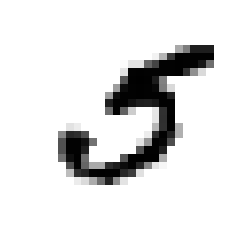

In [5]:
# Preparando visualização
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

Perceba que foi utilizado o método ```reshape()``` para a plotagem gráfica. Para entender melhor o que aconteceu, vamos visualizar separadamente cada uma das variáveis envolvidas no bloco acima e também o conteúdo de cada um dos elementos do dataset.

In [6]:
# O que é some_digit antes do reshape?
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Trata-se de um array com todos os "níveis de intensidade" dos pixels em cada uma das 784 features.

In [7]:
# Será que some_digit representa um único digito com as 784 features?
some_digit.shape

(784,)

Exatamente! Mas o que acontece após o reshape?

In [8]:
# Resultado após o reshape
some_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

Aparentemente os dados foram transformados em outro formato (28 linhas por 28 colunas). Vamos verificar o que acontece com o ```shape```.

In [9]:
# Novo shape após reshape
some_digit_image.shape

(28, 28)

Faz sentido. Demos um ```reshape()``` no array anterior de (784,) e passamos, como argumento, os índices (28, 28), transformando-o então em um novo array com dimensões (28, 28).

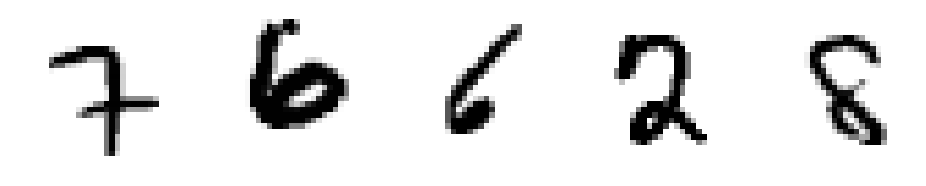

In [10]:
# Customizando print para visualizar demais dados
import numpy as np

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for axe in ax:
    another_digit = X[np.random.randint(70000)]
    another_digit_image = another_digit.reshape(28, 28)
    axe.imshow(another_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
    axe.axis('off')

Como visto, o dado representado por ```X[36000]``` indica o numeral "5". Vejamos se o label está correto.

In [11]:
# Verificando label de X[36000]
y[36000]

5.0

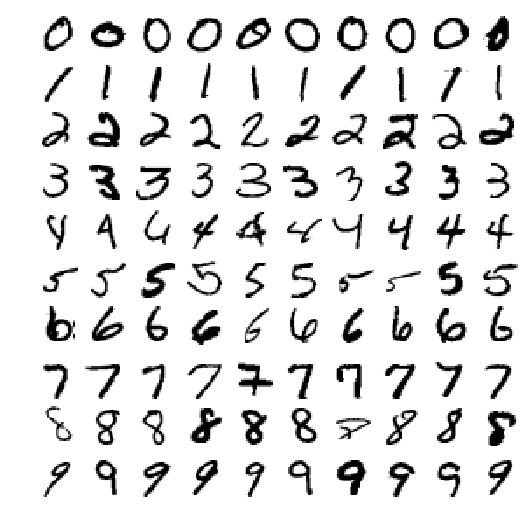

In [12]:
# Plotando mais dados
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)

## Dados de Treinamento e Dados de Teste

O dataset MNIST já está previamente seperado em training e test set. As primeiras 60.000 linhas representam **dados de treinamento**, enquanto as últimas 10.000 imagens representam **dados de teste**.

In [13]:
# Separando dados
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
# Verificando
X_train.shape

(60000, 784)

In [15]:
# Verificando
y_test.shape

(10000,)

### Embaralhando os Dados 

Aplicar este processo é muito importante para garantir que todas as ```cross-validation``` sejam similares. Não é desejado que em um ```fold``` do cross-validation esteja faltando algum digito. Além disso, alguns algoritmos são sensíveis à ordem das instâncias durante o treinamento, performando mal se encontrarem instâncias iguais em uma mesma leva. O Shuffling (ou embaralhamento) dos dados evita este processo.

In [16]:
# Aplicando shuffling
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Verificando resultados do métoodo ```permutation()``` e da variável shuffle_index.

In [17]:
# O que seria np.random.permutation?
np.random.permutation(60000)

array([10467, 50665, 33477, ..., 59686, 20331,  4033])

In [18]:
# shuffle_index
shuffle_index

array([25406, 47446, 48026, ..., 54114, 48213,  3142])

Indexar os datasets com ```shuffle_index``` significa embaralhar os índices de cada um deles de maneira aleatório, selecionando os dados e modificando a ordem original dos elementos.

# Treinando um Classificador Binário

Agora que já estamos familiarizados com o MNIST e, dada as aplicações de alguns conceitos preparatórios, o primeiro passo para adentar em problemas de classificação é trabalhar em uma espécie de classificador binário.

Em outras palavras, iremos criar um modelo que responde apenas "Sim" ou "Não" para uma pergunta do tipo: "Este número equivale ao numeral X?". No caso, será escolhido o numeral **5** como alvo da análise e será treinado um algoritmo "Classificador de 5s".

In [19]:
y_train[:5]

array([4., 7., 7., 5., 1.])

In [20]:
# Separando um dígito alvo
y_train_5 = (y_train == 5) # Verdadeiro para todos os 5s, Falso para o resto.
y_test_5 = (y_test == 5)

In [21]:
# Verificando
y_train_5

array([False, False, False, ..., False, False, False])

In [22]:
# O terceiro número (False) é um 5?
y_train[2]

7.0

In [23]:
# E o último número (True)?
y_train[-1]

0.0

Como modelo, será utilizado o ```SGDClassifier```, sendo capaz de tratar com eficiente grandes datasets.

In [24]:
# Importando biblioteca e treinando modelo
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Para verificar, a princípio, o resultado do treinamento, vamos voltar ao que tínhamos com a variável ```some_digit```

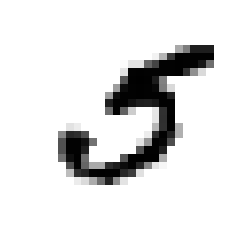

In [25]:
# Preparando visualização
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [26]:
# Como já visto, o elemento 36000 do dataset é um 5
y[36000]

5.0

In [27]:
# Mas será que o algoritmo reconhece?
sgd_clf.predict([some_digit])

array([ True])

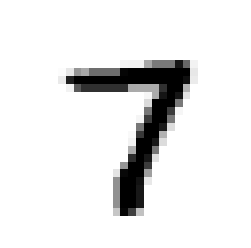

In [28]:
some_digit = X[46000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [29]:
y[46000]

7.0

In [30]:
sgd_clf.predict([some_digit])

array([False])

O modelo previu corretamente. Realmente o "Classificador de 5s" funcionou para este caso. Vamos avaliar sua performance.

# Avaliando Performance

Para modelos de Classificação, serão apresentadas diversas maneiras de medir a performance de um algoritmo treinado.

## Accuracy

In [31]:
# Importando módulos e realizando medições
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.962  , 0.95815, 0.9244 ])

O código acima exemplifica a avaliação do modelo  ```SGDClassifier()``` utilizando três ```folds``` através da validação cruzada. Lembrando que este processo trata da divisão do set de treinamento em K-folds (neste caso, três), ou seja, subconjuntos compostos por dados de treino e de "verificação". Em um batch de processamento, é realizado o treinamento do modelo em um subconjunto desses dados com a subsequente verificação realizada no fold restante. Após isso, mais um batch de folds é separado e o processo é repetido tal que, no final, todos os folds serão treinados e a avaliação será feita em todos os folds.

Antes de ficarmos animados com os índices superiores a 95% de performance, vamos avaliar um segundo classificador de ```não-5s```

In [32]:
# Classificando não-5s
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [33]:
# Realizando o mesmo procedimento
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9113 , 0.9094 , 0.90825])

Bom, chegamos a uma acurácia de pouco mais de 90%. Isto se deu pois apenas aproximadamente 10% das imagens são 5s, portanto, se você SEMPRE predizer que uma imagem **não** é um 5, você estará certo 90% do tempo!

    Isto demonstra que, no geral, a acurácia não é o meio mais adequado para medir a performance de classificadores.

## Confusion Matrix

Para computar a Matriz de Confusão, é necessário possuir um set de _predictions_ para que estes sejam comparados aos valores _target_. Para tal, seria possível realizar predições no set de teste, entretanto, a ideia é deixa-lo intocável o tanto quanto possível. Dessa forma, os valores serão obtidos através de predições nos próprios dados de treinamenteo.

Para reunis *predições* ao invés de *scores*, basta mudar o método ```cross_val_scores()``` para ```cross_val_predict```.

In [34]:
# Predições altenartivas
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [35]:
# Verificando matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53091,  1488],
       [ 1621,  3800]], dtype=int64)

Explicando a Matriz de Confusão:
    - Cada linha representa uma classe target;
    - Cada coluna representa uma classe predita;
    
    - A primeira linha considera imagens "não-5s" (classe negativa);
        - +53.000 imagens foram corretamente classificadas como "não-5s" (verdadeiro negativo);
        - +1000 imagens foram incorretamente classificadas como "5s" (falso positivo);
    - A segunda linha considera imagens de "5s" (classe positivva);
        - +1200 imagens foram incorretamente classificadas como "não-5s" (falso negativo);
        - +4000 imagens foram corretamente classificadas como "5s" (verdadeiro positivo);

Uma outra forma de pensar:
    
Primeira coluna - **não-5**
        - Primeira linha: corretamente (True Negative - Verdadeiro Negativo);
        - Segunda linha: incorretamente (False Negative - Falso Negativo);
    
Segunda coluna - **5**
        - Primeira linha: incorretamente (False Positive - Falso Positivo);
        - Segunda linha: corretamente (True Positive - Verdadeiro Positivo).

In [36]:
# Exemplo de classificador perfeito

np.array([[54579, 0], [0, 5421]])

array([[54579,     0],
       [    0,  5421]])

## Precision

    - Indica o quão acertivo é o modelo. Por exemplo, dos itens classificados como 5, quantos realmente são 5?

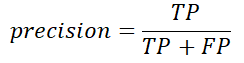

    - Onde:
           - TP = True Positives (5 = 5)
           - FP = False Positives (não-5 = 5)

Sozinho, o índice de _precision_ não diz muito. Normalmente é utilizado junto a outro índice conhecido como _recall_.

## Recall

    - Indica algo relacionado a taxa de detecção do algorítmo. De todos os 5s, quantos realmente foram classificados como 5?

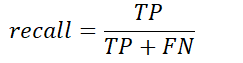

    - Onde:
            - TP = True Positives (5 = 5)
            - FN = False Negatives (5 = não-5)

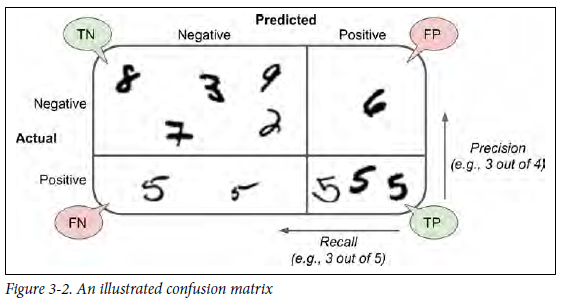

## Precision and Recall

O módulo ```sklearn.metrics``` possui uma série de indicadores para medição de performance. Entre eles, ```precision``` and ```recal```.

In [37]:
# Visualizando novaamente a matriz de confusão
confusion_matrix(y_train_5, y_train_pred)

array([[53091,  1488],
       [ 1621,  3800]], dtype=int64)

In [38]:
# Importando métricas
from sklearn.metrics import precision_score, recall_score

print(f'Precision: {precision_score(y_train_5, y_train_pred)}') # = 4029 / 4029 + 735'
print(f'Recall: {recall_score(y_train_5, y_train_pred)}') # = 4029 / 4029 + 1392}'

Precision: 0.7186081694402421
Recall: 0.7009776793949456


Note que agora o classificador não parece tão interessante quanto antigamente. Possui 85% de precisão de 74% de recall. Em outras palavras, classifica corretamente um 5 em 85% das vezes, enquanto detecta apenas 74% dos 5s.

## F1 Score

O índice ```f1score``` nada mais é do que uma combinação fiel entre ```precision``` e ```recall```. Fórmula:

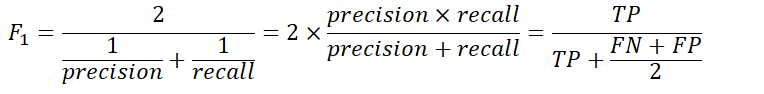

In [50]:
# Computando f1_score
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7096834438322907

O ```f1_score``` favorece classificadores que possuem índices de precision e recall bem próximos. Porém, isto não é sempre o desejado.    

## Precision/Recall Tradeoff

Como visto, tanto o Precision quando o Recall são dois índices extremamente importantes na análise de resultados. Entretando, ambos possuem uma espécie de "troca". Veja alguns exemplos:

* **Classificador para detectar conteúdo impróprio para crianças: **
    - Preferível um algoritmo que rejeita bons vídeos (baixo recall), mas mantém sempre os vídeos seguros (alta precisão)
    - Imagine um modelo que não rejeite bons vídeos (alto recall) mas que deixe alguns vídeos ruins passarem (baixa precisão). Péssimo.


* **Classificador para detectar ladrões em vídeos de segurança:**
    - Preferível um modelo menos preciso, contanto que o recall seja extremamente elvado.
    - Isto significa que os guardas receberão alguns alarmes falsos, porém com certeza nenhum ladrão irá passar despercebido.

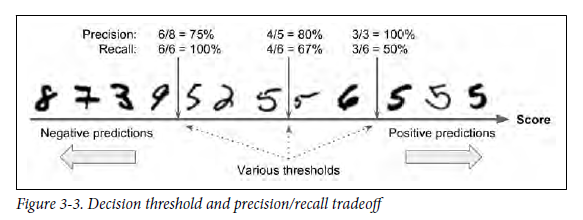

Situação 1 - Threshold no centro:
    - Precision de 80% (5 imagens classificadas como "cinco", porém apenas 4 o são -> 4/5);
    - Recall de 67% (De 6 "cincos", apenas 4 são classificados como tal -> 4/6);
Situação 2 - Threshold à direita:
    - Precision de 100% (3 imagens classificadas como "cinco", sendo as 3 acertadamente -> 3/3);
    - Entretanto, Recall cai para 50%, uma vez que, de 6 "cincos", apenas 3 são ditos como um -> 3/6);
Situação 1 - Threshold à esquerda:
    - Precision de 75% (8 imagens presentes, sendo 6 delas classificadas como "cinco" -> 6/8);
    - Recall de 100%, pois todos os 6 "cincos" foram classificados como tal -> 6/6).

Ao invés de chamar o método ```predict()``` do classificador, há um outro método do scikit chamado ```decision_function()``` que, por sua vez, retorna um score para cada instância e faz predições baseadas nesses scores, utilizando qualquer threshold definido.

In [54]:
# Lembra do some_digit?
some_digit = X[36000]
y[36000]

5.0

In [55]:
# Chamando decision function
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([188.55640373])

In [56]:
# Modificando threshold
threshold = 0 # Padrão
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [57]:
# Modifiando threshold
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [58]:
# Modifiando threshold
threshold = 50000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [59]:
another_digit = X[3030]
y[50]

0.0

In [60]:
y_scores = sgd_clf.decision_function([another_digit])
y_scores

array([-6647.48318359])

In [61]:
# Modifiando threshold
threshold = 50000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Perceba que este *score* retornado por ```decision_function()``` pode ser exemplificado como uma posição em uma linha que descreve a classificação de 5s e não 5s (semelhante a mostrada acima). Se estivermos falando de um Verdadeiro Positivo (5 classificado como 5), qualquer threshold colocado **abaixo** do score relativo à este instância, não afetará a classificação.

Entretando, colocar um threhsold **acima** do score destas instância (ou de qualquer outra instância TN), afetará o resultado. Em outras palavras, um Verdadeiro Positivo não mais será um Verdadeiro Positivo.

In [62]:
# Realizando mais testes
threshold = 30000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [63]:
# Outro dígito
rand = np.random.randint(60000)
outro_digito = X[rand]
print(f'Dígito escolhido: {y_train[rand]}')
y_scores_outro = sgd_clf.decision_function([outro_digito])
print(f'Score relacionado: {y_scores}')
threshold = 100000 * np.random.randn()
y_outro_digito_pred = (y_scores_outro > threshold)
print(f'Predição com threhsold = {threshold}: {y_some_digit_pred}')

Dígito escolhido: 2.0
Score relacionado: [-6647.48318359]
Predição com threhsold = -303502.3882483193: [False]


Como definir o threshold mais adequado?
    - Para tal, será necessário retornar os scores com cross_validation e plotar uma curva de precision e recall

In [64]:
# Calculando scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')
y_scores

array([-15503.1006466 ,  -6626.12451119, -20665.65484481, ...,
        -9192.23348427, -14694.67391642, -12449.021872  ])

In [65]:
# Agora é possível plotar a curva de Precision vs Recall para todos os possíveis thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [66]:
# Visualizando precisions
precisions

array([0.09041932, 0.09040415, 0.09040566, ..., 1.        , 1.        ,
       1.        ])

In [67]:
# Recalls
recalls

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [68]:
# Thresholds
thresholds

array([-108419.06341882, -108055.18654016, -108000.8749271 , ...,
         38595.12859775,   41062.6505045 ,   44667.13412802])

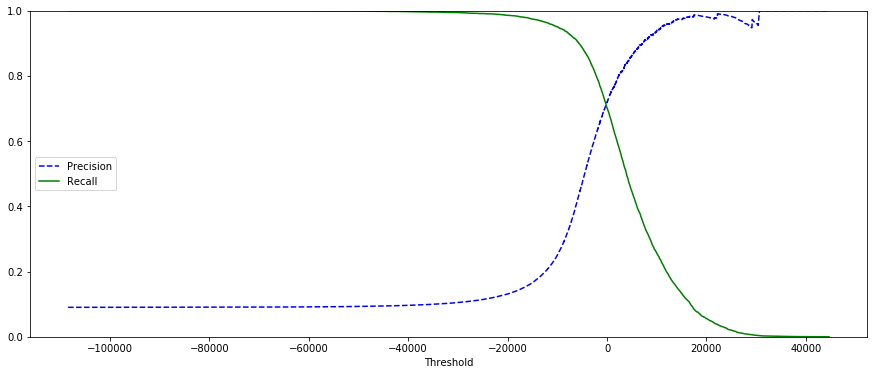

In [69]:
# Plotando curva
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15, 6))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Determinando Precisão

Suponha que, para o problema a ser resolvido, deseja-se alcançar uma precisão de 90%. Neste caso, é interessante visualiar os índices plotados em um grafico de ```Precision``` versus ```Recall```.

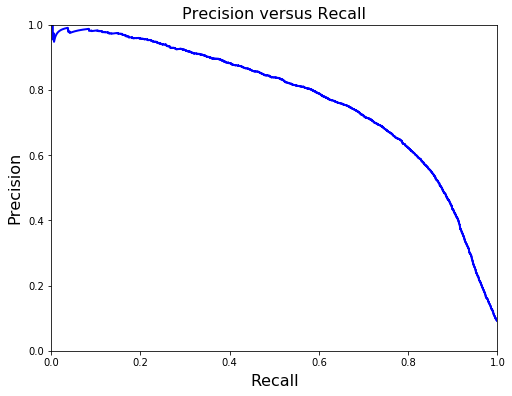

In [70]:
# Definindo função
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.title('Precision versus Recall', fontsize=16)
    plt.xlabel('Recall', fontsize=16, labelpad=6)
    plt.ylabel('Precision', fontsize=16, labelpad=6)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))

# Chamando função
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [71]:
# Determinando precisão de, pelo menos, 90%
y_train_pred_90 = (y_scores > 70000) # Aumentar esse valor (threshold), aumenta precision (e diminui recall)

In [72]:
# Lembrando o que é y_scores
y_scores

array([-15503.1006466 ,  -6626.12451119, -20665.65484481, ...,
        -9192.23348427, -14694.67391642, -12449.021872  ])

```y_scores``` possui os scores de TODAS as instâncias do dataset de treinamento e foi gerado através da função ```cross_val_predict()```.

In [78]:
# Quantidade do array y_scores
y_scores.shape

(60000,)

```y_train_pred_90``` nada mais é do que um array de True e False definido pela condição y_scores > 70000

In [74]:
# Verificando
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [75]:
# Verificando precision
precision_score(y_train_5, y_train_pred_90)

C:\Users\thipa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [76]:
# Verificando recall
recall_score(y_train_5, y_train_pred_90)

0.0

Dessa forma, pôde ser verificado que é possível configurar o algoritmo o modela-lo para qualquer precisão que se queira, desde que respeitados os índices de recall propostos pelo projeto. É necessário avaliar caso a caso. Dependendo da situação, não vale a pena possuir um algorítimo extremamente preciso quando seu recall é muito baixo.

In [77]:
# Será que o termo ajustável não possui limites aceitáveis?
ajuste = 1000000
y_train_ajuste = y_scores > ajuste
print(f'Precision: {precision_score(y_train_5, y_train_ajuste):.2f}')
print(f'Recall: {recall_score(y_train_5, y_train_ajuste)}')

Precision: 0.00
Recall: 0.0


## The ROC Curve

    Receiver Operating Characteristic (ROC)

Esta curva é outra ferramenta comum usada para **classificadores binários**. Ela é muito semelhante à curva vista há pouco de precision/recall, com a diferença de que a ROC plota o TPR (True Positive Rate) contra o FPR (False Positive Rate).

Lembrando:
    * FPR: False Positive Rate -> Instâncias negativas (não-5s) erroneamente classificadas como positivas (5s).
           FPR = 1 - TNR
    
    * TNR: True Negative Rate -> Instâncias negativas (não-5s) corretamente classificadas como negativas (não-5s).
    
    * TPR: True Positive Rate -> Instâncias positivas (5s) corretamente classificados como positivas (5s).

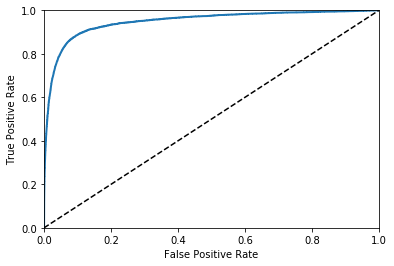

In [79]:
# Plotando ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [80]:
# O que seria fpr?
fpr

array([0.        , 0.        , 0.        , ..., 0.99915718, 0.99915718,
       1.        ])

In [81]:
# E tpr?
tpr

array([0.00000000e+00, 1.84467810e-04, 3.87382402e-03, ...,
       9.99815532e-01, 1.00000000e+00, 1.00000000e+00])

In [82]:
# Dimensões
print(fpr.shape)
print(tpr.shape)

(4518,)
(4518,)


In [84]:
# Qual o threshold?
thresholds

array([  44668.13412802,   44667.13412802,   30668.00833689, ...,
       -108055.18654016, -108419.06341882, -149112.96224918])

```tpr``` e ```fpr``` representam as probabilidades da amostra ser, respectivamente Verdadeira Positiva ou Falsa Positiva.

Um novo **tradeoff** aparece:
    - Quanto maior o recall (TPR), mais falsos positivos (FPR) o classificador produz.
    
    - Um Classificador perfeito possuiria a área da curva (ROC AUC - Area Under the Curve) igual a 1 e tão distante quanto possível da linha linear (área = 0.5).

In [ ]:
# Verificando roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

Quando usar ```Precision/Recall curve``` ou ```Roc_Curve```? Dica:
* Caso a classe positiva seja de rara aparição ou quando há um interesse maior em falsos positivos (não-5s classificados como 5) do que falsos negativos (5s classificados como não-5s) -> PR Curve
* Analisando o classificador binário de 5s com a ROC Curve, aparentemente percebe-se que tudo está muito bom. Entretanto, isso se deve ao fato de termos poucas instâncias de 5s disponíveis. Realizando esta mesma análise com a curva PR, é possível perceber que o algoritmo possui espaço para aprimoramento.

## Comparação com Random Forest

O classificador ```RandomForest()``` não possui um método de ```decision_function()```, entretando, nele é possível encontrar um método chamado ```predict_proba()``` que, por via de regras, possui a mesma filosofia.

In [ ]:
# Treinando classificador
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba')

In [ ]:
# Verificando o resultado 
y_probas_forest

O método ```predict_proba()``` retorna um array contendo uma linha por instância e uma coluna por classe (target). Parece confuso mas, em outras palavras, cada linha deste array representa a probabilidade de uma instância ser classificada em determinado label. Vejamos:

In [ ]:
# Testando afirmação acima
y_probas_forest[0]

In [ ]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

Muito provavelmente trata-se do elemento ```9```, dado que há 90% desta instância pertencer à esta classe. Também há 10% de chance de ser 5, porém me parece inviável. 

In [ ]:
# Checando 
y_train[0]

In [ ]:
# Outro exemplo
y_probas_forest[1]

In [ ]:
# Aparentemente é um 2
y_train[1]

Correto! Todavia, para plotar a curva ROC, são necessários ```scores``` e não ```probabilidades```. Uma solução simples é utilizar a probabilidade da classe positiva como score.

In [ ]:
# Gerando scores
y_scores_forest = y_probas_forest[:, 1] # score = proba da classe positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
# Verificando resultado
y_scores_forest

In [ ]:
# Comparando alterações
print(y_probas_forest.shape)
print(y_scores_forest.shape)

Pelos testes realizados alterando o número da coluna em ```[:, x]```, é possível dizer que ```y_scores_forest``` representa a probabilidade de cada uma das instâncias (em um formato de array único), representar a classe referida por ```x``` dentro da expressão acima.

Por exemplo, no caso de ```y_probias_forest[:, 1]```, estamos retornando um array onde cada elemento representa a probabilidade de cada instância representar o numeral ```1```. A prova disso foi que, ao passar o número 9 como coluna em ```x```, temos que o primeiro elemento do array possui um valor de 0.9. Isso foi testado logo acima, visto que o primeiro elemento do dataset ```y``` realmente representa um 9.

In [ ]:
# Plotando curva comparando RandomForest com SGD
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

Aparentemente aconteceu um problema. O livro contém um equívoco. Você consegue descobrir?

In [ ]:
# Gerando scores
y_scores_forest = y_probas_forest[:, 5] # score = proba da classe positiva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

# Plotando curva comparando RandomForest com SGD
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

A curva do RandomForest é muito melhor. Vamos verificar o score disso.

In [ ]:
# Verificando score
roc_auc_score(y_train_5, y_scores_forest)

In [ ]:
# Medindo precision
print(f'Precision: {precision_score(y_train_5, y_scores_forest)}')
print(f'Recall: {recall_score(y_train_5, y_scores_forest)}')

Deu erro. Verificando o por que.

In [ ]:
# Temos como argumentos
y_train_5

In [ ]:
# Segundo argumento
y_scores_forest

In [ ]:
forest_clf.fit(X_train, y_train_5)
y_train_pred = forest_clf.predict(X_train)

In [ ]:
# Anteriormente, no sgd classifier, precision e recall foram retornados da seguinte forma
print(f'Precision: {precision_score(y_train_5, y_train_pred)}') # = 4029 / 4029 + 735'
print(f'Recall: {recall_score(y_train_5, y_train_pred)}') # = 4029 / 4029 + 1392}'

Onde ```y_train_pred``` foi gerado por:

    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
# Aplicando a mesma filosofia com Random Forest
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

print(f'Precision: {precision_score(y_train_5, y_train_pred_forest)}')
print(f'Recall: {recall_score(y_train_5, y_train_pred_forest)}')

Valores bateram com o que foi proposto no livro.

# Multiclass Classification

    Ler anotações no livro sobre classificadores OvA (one-versus-all) e OvO (one-versus-one).
    Alguns exemplos:
    - SVM (OvO) -> escala mal com o aumento do tamanho dos dados
    - Binary classification -> OvA

In [ ]:
# Treinando classificador de digitos com SGD
sgd_clf.fit(X_train, y_train) # perceba que agora é y_train e não y_train_5

# Prevendo valor 5
sgd_clf.predict([X_train[2]])

In [ ]:
sgd_clf.predict([X_train[0]])

O scikit-learn, nos bastidores, realizou treinamentos para 10 classificadores binários (temos 10 classes possíveis), coletou as decision_scores de cada um deles e, por fim, selecionou um output com a maior score entre todos (no caso, 5).

In [ ]:
# Verificando com os próprios olhos
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

Perceba que o índice onde o score é máximo pertence ao número 5.

In [ ]:
# Verificando isso
np.argmax(some_digit_scores)

In [ ]:
# Verificando ordenação dos labels dentro do classificador
sgd_clf.classes_

In [ ]:
# Retornando label referente ao índice de score máximo
sgd_clf.classes_[np.argmax(some_digit_scores)]

Também é possível forçar o scikit-learn a trabakhar com métodos OvO ou OvA através das classes ```OneVsOneClassifier``` e ```OneVsRestClassifier```.

In [ ]:
# Forçando OvO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

Funcionou bem.

In [ ]:
# Detalhes sobre este output
len(ovo_clf.estimators_)

In [ ]:
# Um classificador RandomForest também cabe
forest_clf.fit(X_train, y_train)
some_digit = X[36000]
forest_clf.predict([some_digit])

In [ ]:
# Verificandoprobabilidades
forest_clf.predict_proba([some_digit])

some_digit tem 100% de chance de ser um 5!

## Avaliando Performance

In [ ]:
# Avaliando SGDClassifier
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

Ainda é possível melhorar através de uma técnica já vista: ```StandardScaler```

In [ ]:
# Aplicando scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Realizando novo treinamento
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

Melhorou muito!

In [ ]:
# Avaliando matriz de confusão
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

São muitos números para se analisar. Seria bem melhor visualizar este resultado em formato gráfico. Diferente da ```classificação binária``` a ```classificação multiclasse``` possui uma matriz de confusão que faz o cruzamento de todas as classes (outputs) com todas as classes, sendo difícil realizar uma avaliação baseada em números.

In [ ]:
# Plotando matriz de confusão
plt.figure(figsize=(12, 8))
plt.matshow(conf_mx, cmap='binary')
plt.show()

Pelo resultado acima exposto, é possível concluir que trata-se de um bom classificador, uma vez que as faixas mais escuras concentram-se na diagonal. Porém, vamos entender melhor o que significam as manchas cinzas.

In [ ]:
# Visualizando melhor
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
a
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

As colunas 8 e 9 possuem quadrados mais claros que as outras. Isto significa que muitas imagens são classificadas erroneamente como 8s e 9s.

Da mesma forma, as linhas 8 e 9 também possuem quadrados mais claros, mostrando que os próprios digitos 8 e 9 são confundidos com outros.

Outra análise a ser feita diz respeito à coluna 1 que, por sua vez, é bem escura, mostrando que dificilmente há erros neste caso (apenas uma pequena parte pode ser confundida com 8).

    Os erros não são simétricos: e.g. há mais 5s classificados como 8s do que ao contrário

Esta matriz proporciona diversos insights em como melhorar a performance do algoritmo. Por exemplo, tendo em vista os resultados acima explorado, seria importante pensar em uma forma de mitigar os erros apresentados nos labels 8 e 9. Coletando mais dados destes labels, talvez. Ou então supor novas features, como por exemplo, escrever um algoritmo que consiga calcular o número de loops em um número (8 possui dois, 6 possui um, 5 nenhum) e assim sucessivamente.

Um outro ponto sugerido é o de pré-processamento das imagens (```Scikit-Image```, ```Pillow``` ou ```OpenCV```).

In [ ]:
# Analisando erros individuais (por que 5s são tão confundidos com 3s?)
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(10, 10))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Os dois blocos à **esquerda** mostram dígitos classificados como ```3```.

Os dois blocos à **direita** mostram dígitos classificados como ```5```.

A grande diferençe entre um 3 e um 5 é a posição da pequena linha que junta a linha superior com o arco inferior. Desenhando um 3 com essa junção um pouco à esquerda, provavelmente geraria uma classificação como 5 pelo algoritmo. Uma solução pra isso seria pre-processar as imagens para que estas fiquem bem centraliadas e não tão inclinadas. Provavelmente a performance aumentaria.

# Multilabel Classification

In [ ]:
# Exemplo com knn
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

Entendendo o problema:
    - Uma tarefa Multilabel indica que temos dois possíveis labels para predizer.
    - No caso acima, foi separado dois datasets:
        - "large", indicando números maiores ou iguais a 7
        - "odd", indicando números ímpares.
    - Assim, espera-se do algoritmo, ao receber novas instâncias, uma previsão do tipo [0, 1], e.g. "not_large" e "odd"

Verificando detalhes das variáveis envolvidas:

In [ ]:
# Array indicando todos os elementos maiores ou iguais a 7
y_train_large

In [ ]:
# Mesmo shape conhecido
y_train_large.shape

In [ ]:
# Array indicando todos os elementos ímpares
y_train_odd

In [ ]:
# Mesmo shape conhecido
y_train_odd.shape

In [ ]:
# Resultado da junção
y_multilabel

In [ ]:
# Shape modificado (colunas)
y_multilabel.shape

In [ ]:
# Realizando predições
knn_clf.predict([some_digit])

Exatamente! O numeral 5 realmente é número "not-large" (<=7, primeiro False), porém ímpar (segundo True).

## Avaliando Performance

In [ ]:
# Medindo f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

O caso acima indica um score baseando-se na igualdade dos labels, o que pode não ser o caso. Por exemplo, podemos possuir muito mais números pares do que ímpares, ou muito mais números baixos do que altos. Neste caso, ```average='macro'``` não cabe muito bem. Para resolver, é possível colocar pesos nos labels, indicando o parâmetro ```average='weighted'```.

In [ ]:
# Modificando parâmetros
f1_score(y_multilabel, y_train_knn_pred, average='weighted')

# Multioutput Classification

Exemplo: algoritmo que recebe uma imagem cheia de ruídos (sujeira) e limpe. O outpout do algorimo serão muitos labels (28x28 -> um label por pixel), ademais, cada label pode possuir diversos valores (pixels de 0 a 255 de intensidade), portanto trata-se de um exemplo de **Multioutput Classification**.

In [ ]:
# Aplicando exemplo
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

In [ ]:
# Visualizando resultados
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [ ]:
# Treinando modelo pra receber imagem "ruim" e retornar a boa
knn_clf
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

Algoritmo aparentemente conseguiu cumprir com o esperado!